In [1]:
import os
import torch

os.environ["CUDA_VISIBLE_DEVICES"] = "6, 7"
n_gpu = torch.cuda.device_count()
print("num gpu:", n_gpu)

num gpu: 2


In [2]:
!nvidia-smi

Mon Apr 17 06:50:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.105.01   Driver Version: 515.105.01   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:14:00.0 Off |                  N/A |
| 36%   26C    P8    21W / 250W |   5385MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:15:00.0 Off |                  N/A |
| 51%   

In [3]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:15:46_PDT_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0
torch:  1.12 ; cuda:  1.12.1


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/home/ksko/code/electric


# Install YOLOv8

In [5]:
# !pip install ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

# Install Supervision

In [6]:
# !pip install supervision==0.2.0

# from IPython import display
# display.clear_output()

# import supervision as sv
# print("supervision", sv.__version__)

# Download data

In [7]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2" -O video.mp4 && rm -rf /tmp/cookies.txt

In [8]:
CAR_VIDEO_PATH = f"{HOME}/video.mp4"

# Simple YOLOv8 CAR Example

In [9]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

**NOTE:** Let's start vanilla YOLOv8 inference pipeline. 


0: 736x1280 34 cars, 2 buss, 6 trucks, 5 traffic lights, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


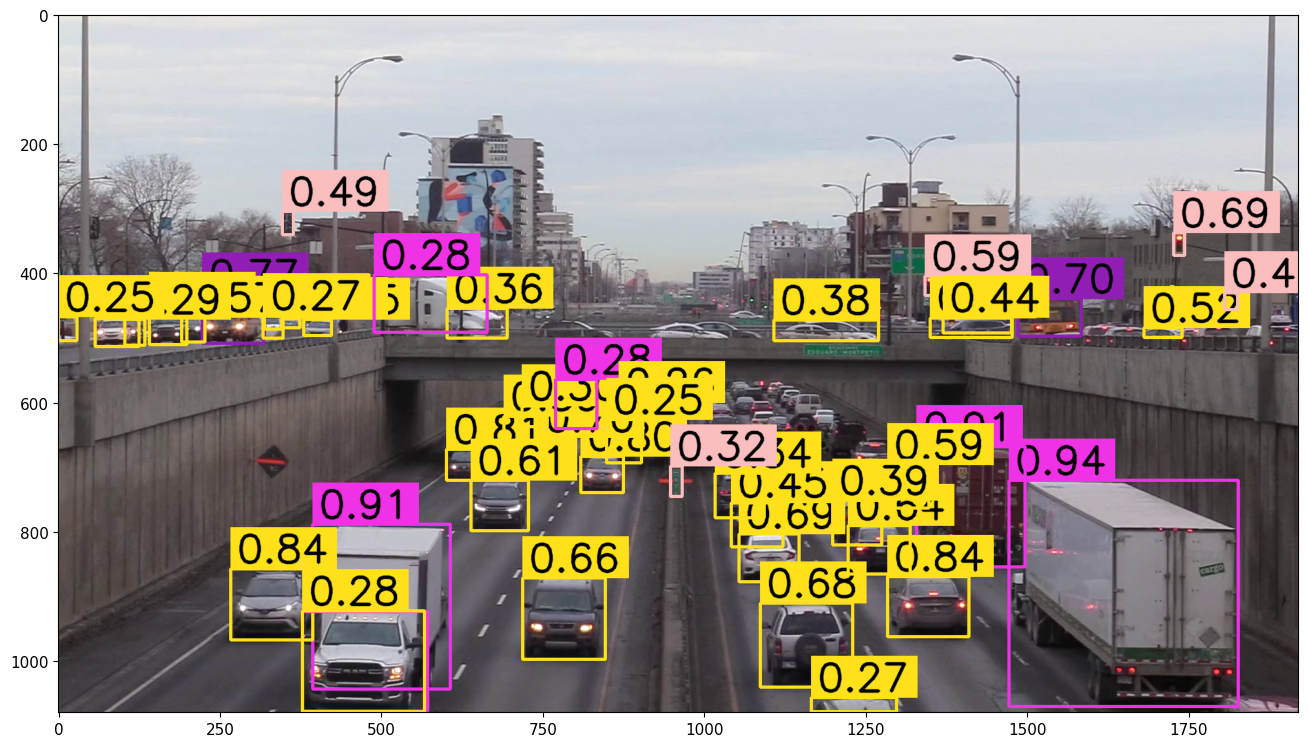

In [10]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(CAR_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))


0: 736x1280 34 cars, 2 buss, 6 trucks, 5 traffic lights, 10.2ms
Speed: 1.0ms preprocess, 10.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1280, 1280)


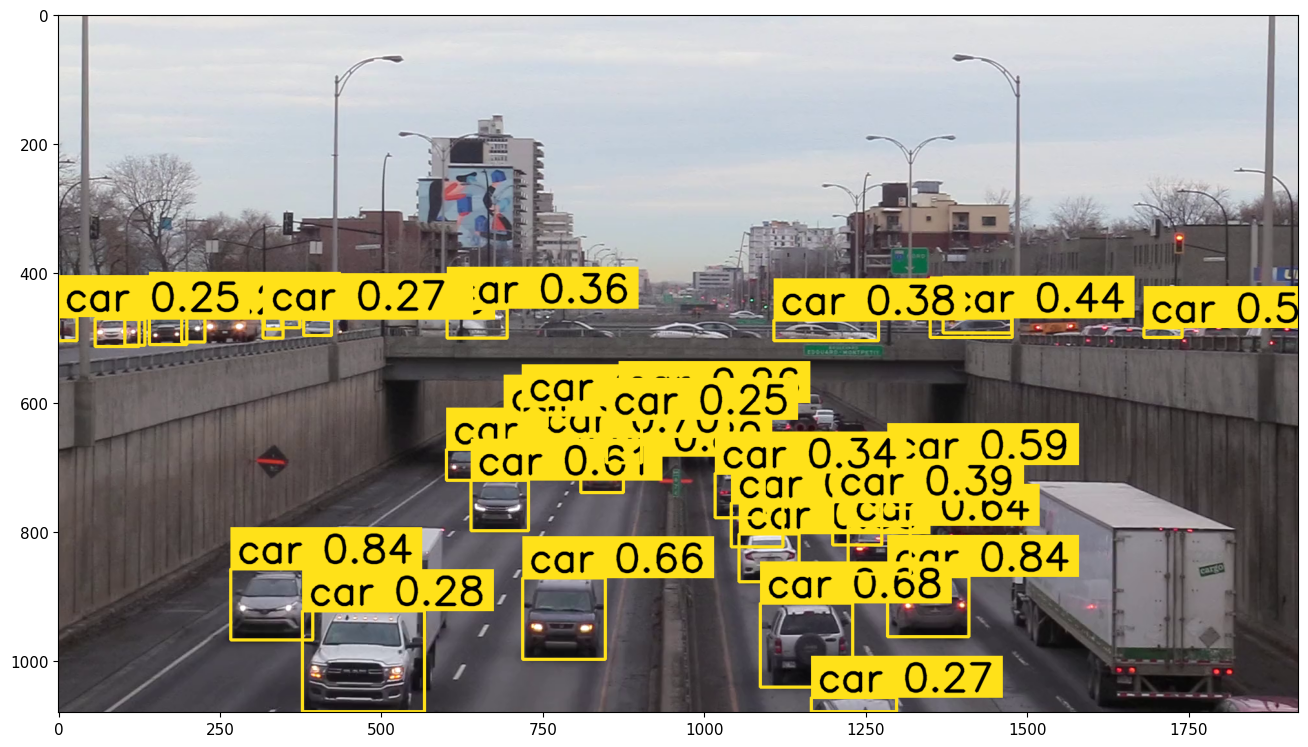

In [11]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(CAR_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[detections.class_id == 2]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [12]:
one = 0
two = 0
three = 0
four = 0

boxes = [one, two, three, four]


0: 736x1280 34 cars, 2 buss, 6 trucks, 5 traffic lights, 10.2ms
Speed: 0.9ms preprocess, 10.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1280, 1280)


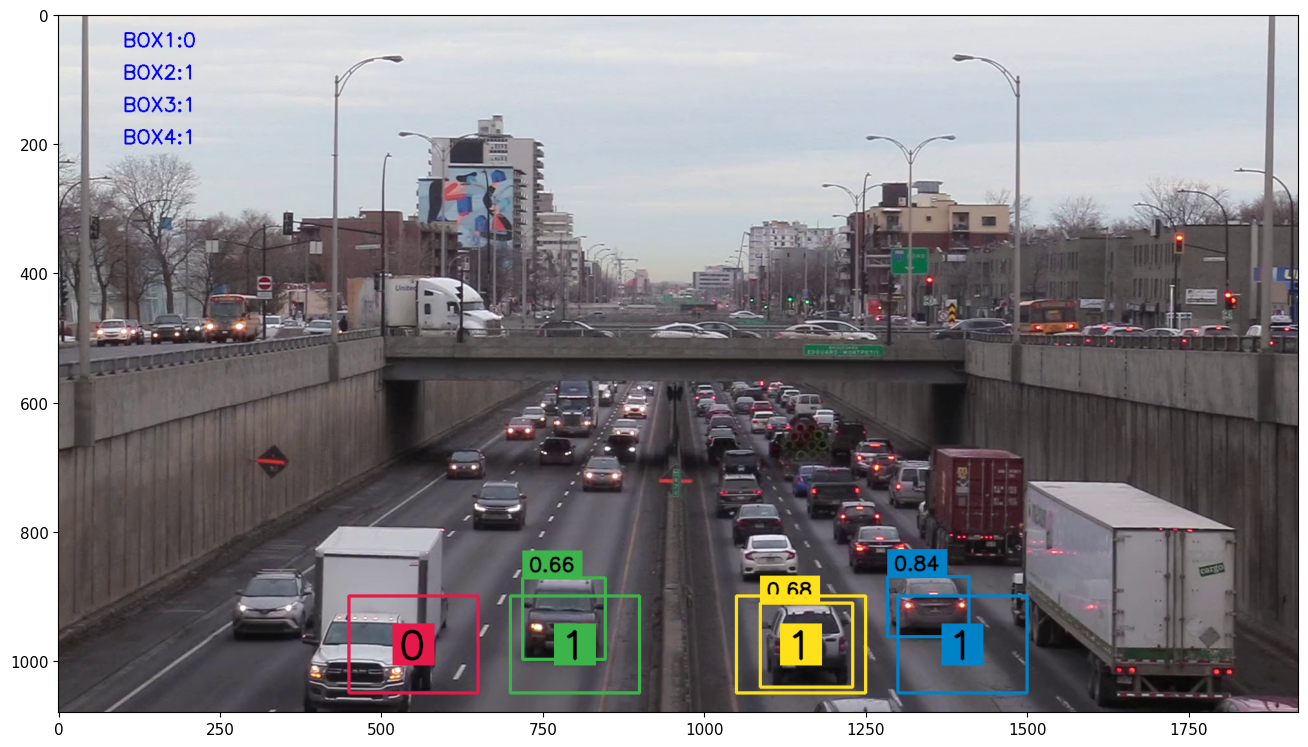

첫번째 박스 탐지 갯수 0
두번째 박스 탐지 갯수 1
세번째 박스 탐지 갯수 1
네번째 박스 탐지 갯수 1


In [13]:
import cv2 as cv

import numpy as np
import supervision as sv

one = 0
two = 0
three = 0
four = 0
boxes = [one, two, three, four]



colors = sv.ColorPalette.default()

# initiate polygon zone
polygons = [
    np.array([
        [450, 900], # x, y
        [650, 900],
        [650, 1050],
        [450, 1050]
    ], np.int32), 
    np.array([
        [700, 900], # x, y
        [900, 900],
        [900, 1050],
        [700, 1050]
    ], np.int32), 
    np.array([
        [1050, 900], # x, y
        [1250, 900],
        [1250, 1050],
        [1050, 1050]
    ], np.int32), 
    np.array([
        [1300, 900], # x, y
        [1500, 900],
        [1500, 1050],
        [1300, 1050]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(CAR_VIDEO_PATH)
zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
        #triggering_position=Position.BOTTOM_CENTER
    )
    for polygon
    in polygons
]
# initiate annotators
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=4,
        text_thickness=4,
        text_scale=2
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=2, 
        text_scale=1
        )
    for index
    in range(len(polygons))
]

# extract video frame
generator = sv.get_video_frames_generator(CAR_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[detections.class_id == 2]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
    frame = zone_annotator.annotate(scene=frame)


for idx, zone in enumerate(zones):
    if zone.current_count > 0:
        boxes[idx] += 1
    else:
        boxes[idx] = 0
        
    cv.putText(frame, f'BOX{idx+1}:{boxes[idx]}', (100, 50*(idx+1)), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))



print(f"첫번째 박스 탐지 갯수 {zones[0].current_count}")
print(f"두번째 박스 탐지 갯수 {zones[1].current_count}")
print(f"세번째 박스 탐지 갯수 {zones[2].current_count}")
print(f"네번째 박스 탐지 갯수 {zones[3].current_count}")
# print(frame)

# Export VIDEO

In [57]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [450, 900], # x, y
        [650, 900],
        [650, 1050],
        [450, 1050]
    ], np.int32), 
    np.array([
        [700, 900], # x, y
        [900, 900],
        [900, 1050],
        [700, 1050]
    ], np.int32), 
    np.array([
        [1050, 900], # x, y
        [1250, 900],
        [1250, 1050],
        [1050, 1050]
    ], np.int32), 
    np.array([
        [1300, 900], # x, y
        [1500, 900],
        [1500, 1050],
        [1300, 1050]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(CAR_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=4,
        text_thickness=4,
        text_scale=2
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=2, 
        text_scale=1
        )
    for index
    in range(len(polygons))
]

def process_frame(frame: np.ndarray, i) -> np.ndarray:
    print(i)
    # detect
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_yolov8(results)
    detections = detections[(detections.class_id == 2) & (detections.confidence > 0.5)]

    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=False)
        frame = zone_annotator.annotate(scene=frame)

    for idx, zone in enumerate(zones):
        if zone.current_count > 0:
            boxes[idx] += 1
        else:
            boxes[idx] = 0
        
        cv.putText(frame, f'BOX{idx+1}:{boxes[idx]}', (100, 50*(idx+1)), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return frame

sv.process_video(source_path=CAR_VIDEO_PATH, target_path=f"{HOME}/car-result.mp4", callback=process_frame)

from IPython import display
display.clear_output()